# Titanic data analysis

**Questions** 

Based on the given dataset, can we say that some groups of people were more likely to survive than others, such as women, children, and the upper-class?

In [257]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**1.Load data**

In [258]:
titanic_df = pd.read_csv('titanic-data.csv')

**2.Describe data**

In [259]:
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [260]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the information above we can see that Age, Cabin and Embarked features contain null values. Seven features are numeric and five features are strings.

In [261]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Total samples are 891 or 40% of the actual number of passengers on board (2224). About 38.4% passengers survived.

In [262]:
titanic_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


We can use 'groupby' to quickly analyze the features which are categorical and do not have any empty values. Specifically we can do so for features Pclass, Sex, SibSp and Parch.

In [263]:
group_by_Pclass = titanic_df.groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
group_by_Pclass[['Pclass', 'Survived']]

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


There is a significant correlation among Pclass and Survived. The upper-class passengers (Pclass=1) were more likely survived.

In [264]:
group_by_Sex = titanic_df.groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
group_by_Sex[['Sex', 'Survived']]

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female had a very high survival rate(74.2%) compared to male(18.9%).

In [265]:
group_by_SibSp = titanic_df.groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
group_by_SibSp[['SibSp', 'Survived']]

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [266]:
group_by_Parch = titanic_df.groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
group_by_Parch[['Parch', 'Survived']]

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**3.Wrangle data**

PassengerId may be dropped as it does not contribute to survival. Cabin feature maybe dropped as it contains many null values. Ticket maybe dropped as it contains high ratio of duplicates and it is a mix of numeric and alphanumeric data types which makes it hard to interpret.

In [267]:
# Drop 'PassengerId', 'Ticket', 'Cabin'
titanic_df1 = titanic_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
print titanic_df.shape
titanic_df1.shape

(891, 12)


(891, 9)

In [268]:
#female = 1, male = 0, 
def convert_gender(value):
    """
    This function takes a value and returns 0 if the value is 
    'male', 1 if the value is 'female', and the value itself otherwise.
    """
    if value == 'male':
        return 0
    elif value == 'female':
        return 1
    else:
        return value
titanic_df1 = titanic_df1.applymap(convert_gender)
print titanic_df1.head()

   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Embarked  
0  22.0      1      0   7.2500        S  
1  38.0      1      0  71.2833        C  
2  26.0      0      0   7.9250        S  
3  35.0      1      0  53.1000        S  
4  35.0      0      0   8.0500        S  


Embarked feature has S, Q, C values based on port of embarkation. Our dataset has only two missing values so simply fill these with the most common occurance.

In [269]:
freq_port = titanic_df1.Embarked.dropna().mode()[0]
freq_port

'S'

In [270]:
titanic_df1[['Embarked']] = titanic_df1[['Embarked']].fillna(freq_port) 
print titanic_df1.info()
titanic_df1[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB
None


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Age feature still has null values. For simplicity we just use mean value to fill the null values. It is not accurate but easy to do so we get a complete dataset.

In [271]:
age_avg = titanic_df['Age'].mean()
titanic_df1['Age'][np.isnan(titanic_df1['Age'])] = age_avg
titanic_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


D:\Study\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**4.Visualize data**

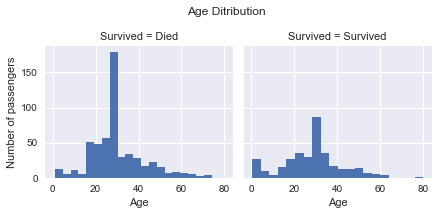

In [272]:
#Use Died and Survived instead of 0 and 1 to be more descriptive
titanic_df1['Survived'].replace({0:'Died', 1:'Survived'}, inplace=True)
grid = sns.FacetGrid(titanic_df1, col='Survived')
g = grid.map(plt.hist, 'Age', bins=20)
plt.subplots_adjust(top=0.8)
sns.plt.suptitle('Age Ditribution')
g.axes[0,0].set_ylabel('Number of passengers')

From the historgram plot above we can see that infants(Age<=4) had a high survival rate. Young passengers from age 16 to age 32 had a low survival rate. Another interesting fact is that the oldest passengers survived. We should definitely consider Age in our model so we need to complete the Age feature for null values.

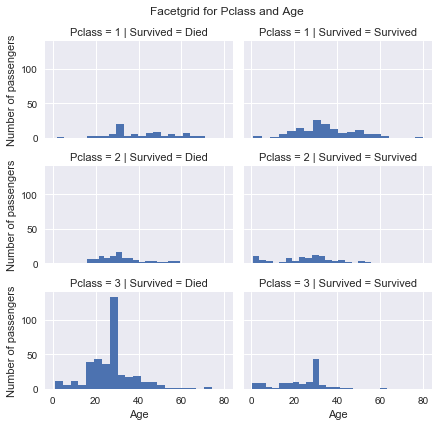

In [273]:
grid = sns.FacetGrid(titanic_df1, col='Survived', row='Pclass', size=2, aspect=1.5)
g = grid.map(plt.hist, 'Age', bins=20)
plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Facetgrid for Pclass and Age')
g.axes[0,0].set_ylabel('Number of passengers')
g.axes[1,0].set_ylabel('Number of passengers')
g.axes[2,0].set_ylabel('Number of passengers')

Pclass=3 had more infants than Pclass=2 and Pclass=1, however, it had a lower rate to survive. Most passengers in Pclass=1 survived while most passengers in Pclass=3 did not survive. The passengers in Pclass=1 were older.

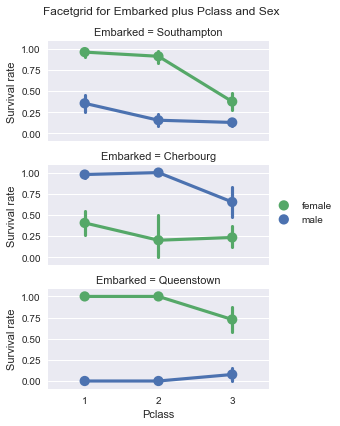

In [274]:
#For this plot we need to convert the survived values back to 0 and 1
#Also convert Embarked variable to full name of the cities 
titanic_df1['Survived'].replace({'Died':0, 'Survived':1}, inplace=True)
titanic_df1['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace=True)
titanic_df1['Sex'].replace({0: 'male', 1:'female'}, inplace=True)
grid_categorical  = sns.FacetGrid(titanic_df1, row='Embarked', size=2, aspect=2)
g = grid_categorical.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid_categorical.add_legend()
plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Facetgrid for Embarked plus Pclass and Sex')
g.axes[0,0].set_ylabel('Survival rate')
g.axes[1,0].set_ylabel('Survival rate')
g.axes[2,0].set_ylabel('Survival rate')

Males had higher survival rate in Embarked=C. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived. It could be explained by that most upper Pclass passengers were male in Embarked=C. 

**6.conclusions**

Based on our analysis, our guess about titanic dataset that some groups of people were more likely to survive than others, such as women, children, and the upper-class is right. The total survival rate is 38.4%. Female had a very high survival rate(74.2%) compared to male(18.9%). The upper-class passengers were more likely survived (Pclass=1 : 0.63, Pclass=2 : 0.47, Pclass=3 : 0.24). From the historgram plot and scatter plot we can see that infants(Age<=4) had a high survival rate.

However our data analysis process is not complete since we did not include Model and predict part. Also for data wrangling phase, we still need some work to do. Name feature can be engineered to extract titles and then we can convert the categorical titles to ordinal for further use. In this project we just used mean value to fill missing values for the Age feature. An accurate way of guessing missing values is to use other correlated features. In our case we may use correlation among Age, Gender, and Pclass.

**7.Used resources:**

https://www.kaggle.com/c/titanic

https://discussions.udacity.com/c/nd002-intro-to-data-analysis/nd002-p-investigate-a-dataset